<a href="https://colab.research.google.com/github/Iamkoss/cis9650_flight_data/blob/main/fligh_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Flight Data from the Buffalo, NY Airport

### Author: Anna Bold, Kossi Gamli, Ran Xin Jiang, Christina Pratas
### Date : December 8th, 2025

## Executive Summary

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
9. Discussion & Interpretation
10. Conclusion
11. References
12. Appendix

## Introduction
This projects examines flight records from Buffalo Niagara International Airport (BUF) for the entirety of January 2025. The following 30 JSON files contain detailed information regarding flight schedules, delays, airports, and timezones, etc. The dataset shows how flights operated throughout the month, including patterns in delays, cancellations, airline performance, and schedule consistency. By organizing this raw data into a structured format, it highlights these trends and provides a clearer picture of BUF's activity during this period.

## Problem Statement / Research Question

The research question is finding out what overlying issues the Buffalo Niagara International Airport may be having with the daily arriving and departing flights in January 2025. There are several different factors to look at, including potential problematic airlines, large discrepancies between scheduled departure/arrival times and actual departure/arrival times, and outlying flight cancellations.


As Buffalo in January is subject to inclement weather, research will also look into if any singular days are outliers in regards to flight delays and cancellations due to weather.

## Data Description

## Setup and Environment

In [15]:
!pip install google-cloud-storage

In [16]:
!git clone https://github.com/Iamkoss/cis9650_flight_data.git

Cloning into 'cis9650_flight_data'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 132 (delta 93), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 293.61 KiB | 2.82 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [17]:
from google.cloud import storage
from io import BytesIO
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os
import glob
from google.cloud import storage
from io import BytesIO

## Data Loading

In [21]:
# Find all BUF json files
files = sorted(glob.glob("/content/cis9650_flight_data/BUF*.json"))

#checking to see if all the files were successful found:
print("Files found:", files)
print("Number of files found:", len(files))


# Store each file's data as a *separate* DataFrame
flight_dfs = {}  # dictionary: file_name → DataFrame

for file in files:
    print("Loading:", (file))

    with open(file, "r") as f:
        data = json.load(f)

    df = pd.json_normalize(data)

    # Save each DataFrame with name like "BUF_1"
    key = os.path.basename(file).replace(".json", "")
    flight_dfs[key] = df

#checking to see that all keys were loaded correctly
print("\nLoaded files (keys):", list(flight_dfs.keys()))
print("Number of DataFrames loaded:", len(flight_dfs))


###combine all dataframes together
if len(flight_dfs) > 0:
  df_all = pd.concat(flight_dfs.values(), ignore_index=True)
  print("Combined: ", df_all.shape)
  df_all.head()
else:
  print("No DataFrames to combine.")





Files found: ['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_fl

In [19]:
# since we already combined all the flight data into one dataset in the cell above, we do not need to recombine into an empty list. ***


# Empty list to store all flight data
#all_flight_data = []

# The key is the filenames
# df is the DataFrame
# for key, df in flight_dfs.items():
#   records = df.to_dict(orient='records')
#   all_flight_data.extend(records)

# print("Total flights:", len(all_flight_data))
# print("Example record:", all_flight_data[0])

Total flights: 5509
Example record: {'flight_date': '2025-01-05', 'flight_status': 'landed', 'live': None, 'departure.airport': 'Buffalo Niagara International', 'departure.timezone': 'America/New_York', 'departure.iata': 'BUF', 'departure.icao': 'KBUF', 'departure.terminal': None, 'departure.gate': '15', 'departure.delay': 20.0, 'departure.scheduled': '2025-01-05T05:00:00+00:00', 'departure.estimated': '2025-01-05T05:00:00+00:00', 'departure.actual': '2025-01-05T05:20:00+00:00', 'departure.estimated_runway': '2025-01-05T05:20:00+00:00', 'departure.actual_runway': '2025-01-05T05:20:00+00:00', 'arrival.airport': 'Orlando International', 'arrival.timezone': 'America/New_York', 'arrival.iata': 'MCO', 'arrival.icao': 'KMCO', 'arrival.terminal': 'A', 'arrival.gate': '129', 'arrival.baggage': '13', 'arrival.scheduled': '2025-01-05T07:50:00+00:00', 'arrival.delay': nan, 'arrival.estimated': '2025-01-05T07:32:00+00:00', 'arrival.actual': '2025-01-05T07:33:00+00:00', 'arrival.estimated_runway': 

In [22]:
# i commented out this cell becuase in the prevous cell, i combined all the dataset using pd.concat, making this current cell and the one above it reduaundent


# flight_record = df.to_dict(orient="records")

# df_all = pd.json_normalize(flight_record)
# display(df_all.head())
# print(df_all.shape)
# print(len(df_all))

In [ ]:
print(files)
print(len(files))


['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_flight_data/BUF

In [ ]:
## *******************no longer needed since we converted everything in a single data set earlier above ************



#Convert the pandas DataFrame `df_all` into a list of dictionaries where each row represents a flight record from the DataFrame
# The `orient="records"` argument ensures that each row is converted into a dictionary where column names and cell values are corresponding

flight_record = df_all.to_dict(orient="records")

# Print the first dictionary (flight record) in the `flight_record` list.
# This provides a quick way to inspect the structure and content of a single flight entry.
print(flight_record[0])

# Print the total number of flight records loaded into the `flight_record` list.
# This indicates the total count of individual flights being analyzed.
# print("Total flights:", len(flight_record))

{'flight_date': '2025-01-28', 'flight_status': 'landed', 'aircraft': nan, 'live': None, 'departure.airport': 'Buffalo Niagara International', 'departure.timezone': 'America/New_York', 'departure.iata': 'BUF', 'departure.icao': 'KBUF', 'departure.terminal': None, 'departure.gate': '4', 'departure.delay': 22.0, 'departure.scheduled': '2025-01-28T05:21:00+00:00', 'departure.estimated': '2025-01-28T05:21:00+00:00', 'departure.actual': '2025-01-28T05:42:00+00:00', 'departure.estimated_runway': '2025-01-28T05:42:00+00:00', 'departure.actual_runway': '2025-01-28T05:42:00+00:00', 'arrival.airport': 'Ronald Reagan Washington National Airport', 'arrival.timezone': 'America/New_York', 'arrival.iata': 'DCA', 'arrival.icao': 'KDCA', 'arrival.terminal': '2', 'arrival.gate': 'E55', 'arrival.baggage': '10', 'arrival.scheduled': '2025-01-28T06:52:00+00:00', 'arrival.delay': nan, 'arrival.estimated': None, 'arrival.actual': None, 'arrival.estimated_runway': None, 'arrival.actual_runway': None, 'airline.

In [ ]:
#creating a table to visualize flight information for all cancelled flights
df_flights = pd.DataFrame(all_flight_data)

cancelled_flights_df = df_flights[df_flights['flight_status'] == 'cancelled']

print(f"Total cancelled flights: {len(cancelled_flights_df)}")
display(cancelled_flights_df.head())

Total cancelled flights: 53


,flight_date,flight_status,live,departure.airport,departure.timezone,departure.iata,departure.icao,departure.terminal,departure.gate,departure.delay,...,aircraft.iata,aircraft.icao,aircraft.icao24,aircraft,flight.codeshared.airline_name,flight.codeshared.airline_iata,flight.codeshared.airline_icao,flight.codeshared.flight_number,flight.codeshared.flight_iata,flight.codeshared.flight_icao
585,2025-01-11,cancelled,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,5,NaN,...,A321,A321,A10BBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,2025-01-11,cancelled,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,NaN,...,CRJ7,CRJ7,A97D63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,2025-01-11,cancelled,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1409,2025-01-06,cancelled,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,3,153.0,...,NaN,NaN,NaN,NaN,frontier airlines,f9,fft,1691,f91691,fft1691
1410,2025-01-06,cancelled,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,3,153.0,...,A20N,A20N,A44AA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculating the number and percentage of all cancelled flights.
def count_cancelled_flights(df):
    cancelled_flights = df[df['flight_status'] == 'cancelled']
    return len(cancelled_flights)

# Use the function on df_flights to calcuate the number as well as the percentage of all flights that were cancelled.
num_cancelled_flights = count_cancelled_flights(df_flights)
print(f"Number of cancelled flights: {num_cancelled_flights}")
percentage_cancelled_flights = (num_cancelled_flights / len(df_flights)) * 100
print(f"Percentage of cancelled flights: {percentage_cancelled_flights:.2f}%")

Number of cancelled flights: 53
Percentage of cancelled flights: 0.96%


In [ ]:
def count_landed_delayed_flights(df):
    landed_delayed = df[(df['flight_status'] == 'landed') & (df['departure.delay'] > 0)]
    return len(landed_delayed)

# Use the function on df_flights to calcuate the number as well as the percentage of all flights that were delayed.
num_landed_delayed_flights = count_landed_delayed_flights(df_flights)
print(f"Number of landed flights with a departure delay: {num_landed_delayed_flights}")
percentage_delayed_flights = (num_landed_delayed_flights / len(df_flights)) * 100
print(f"Percentage of landed flights with a departure delay: {percentage_delayed_flights:.2f}%")

Number of landed flights with a departure delay: 4788
Percentage of landed flights with a departure delay: 86.91%


In [ ]:
landed_delayed_flights_df = df_flights[(df_flights['flight_status'] == 'landed') & (df_flights['departure.delay'] > 0)]
display(landed_delayed_flights_df.head())
print(f"Total cancelled flights: {len(landed_delayed_flights_df)}")

,flight_date,flight_status,live,departure.airport,departure.timezone,departure.iata,departure.icao,departure.terminal,departure.gate,departure.delay,...,aircraft.iata,aircraft.icao,aircraft.icao24,aircraft,flight.codeshared.airline_name,flight.codeshared.airline_iata,flight.codeshared.airline_icao,flight.codeshared.flight_number,flight.codeshared.flight_iata,flight.codeshared.flight_icao
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,15,20.0,...,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,16,4.0,...,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total cancelled flights: 4788


In [ ]:
#NEEDS WORKS, DONT KNOW IF WE WILL USE THIS, IT CAME FROM THE EXAMPLE
def get_file_to_dataframe(bucket_name: str, blob_path: str):



    # Download file content as bytes


    # Detect file extension


    # Convert bytes → Python object

        # If JSON is a list → NORMAL DataFrame

        # If JSON is a dict → flatten into rows
        elif isinstance(data, dict):
            df = pd.json_normalize(data)
        else:
            raise ValueError("Unsupported JSON structure")
    else:
        raise ValueError(f"Unsupported file type: {file_extension}")

    return df

In [ ]:
#NEEDS WORKS, BUT IT WILL ALLOW US TO CONVERT THE DICTIONARY INTO COLUMNS, AND THEN WE SHOULD BE ABLE TO SELECT THE COLUMNS WE WANT TO WORK ON.

df_expanded = df.explode("details", ignore_index=True)

# 2. Convert the dict into columns
detail_cols = df_expanded["rows"].apply(pd.Series)

# 3. Merge back and drop the dict column
df_flat = pd.concat([df_expanded.drop(columns=["rows"]), detail_cols], axis=1)

df_flat

## Data Preparation

In [27]:
display(df)

,flight_date,flight_status,live,departure_airport,departure_timezone,departure_iata,departure_icao,departure_terminal,departure_gate,departure_delay,...,aircraft_iata,aircraft_icao,aircraft_icao24,aircraft,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,15,20.0,...,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,16,4.0,...,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,7,41.0,...,NaN,NaN,NaN,NaN,jetblue airways,b6,jbu,2001,b62001,jbu2001
5505,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,15.0,...,B752,B752,A5CE0F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5506,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5507,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#already cleaned data in the below cells *******

def clean_data(df):
    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    return df
all_dfs = clean_data(all_dfs)

In [31]:
#clean up the entire data set (ie. fix the naming of some columns)

#making a copy of the master set (in case of mess up)
df = df_all.copy()
#replacting the column names from . to a _ for easier reading
df.columns = df.columns.str.lower().str.replace('.', '_')

#remove any duplicates from main set
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

df.head()




After dropping duplicates: (5509, 46)


,flight_date,flight_status,live,departure_airport,departure_timezone,departure_iata,departure_icao,departure_terminal,departure_gate,departure_delay,...,aircraft_iata,aircraft_icao,aircraft_icao24,aircraft,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,15,20.0,...,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,16,4.0,...,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#convert the date and time columns to datetime

# Convert main flight date
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce')

# List of time columns to convert
time_columns = [
    'departure_scheduled', 'departure_estimated', 'departure_actual',
    'arrival_scheduled', 'arrival_estimated', 'arrival_actual'
]

# Convert each to datetime
for col in time_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[['flight_date', 'departure_scheduled', 'departure_actual', 'arrival_scheduled', 'arrival_actual']].head()




,flight_date,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
0,2025-01-05,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00
1,2025-01-05,2025-01-05 00:00:00+00:00,NaT,2025-01-05 01:04:00+00:00,NaT
2,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
3,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
4,2025-01-05,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00


In [33]:
#calculate delay time in minutes

# Departure delay in minutes
df['dep_delay_min'] = (
    (df['departure_actual'] - df['departure_scheduled'])
    .dt.total_seconds() / 60
)


# Arrival delay in minutes
df['arr_delay_min'] = (
    (df['arrival_actual'] - df['arrival_scheduled'])
    .dt.total_seconds() / 60
)

print("the negative value means the flight either arrived/departed early.")

df[['departure_scheduled', 'departure_actual', 'dep_delay_min',
    'arrival_scheduled', 'arrival_actual', 'arr_delay_min']].head()




the negative value means the flight either arrived/departed early.


,departure_scheduled,departure_actual,dep_delay_min,arrival_scheduled,arrival_actual,arr_delay_min
0,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,20.0,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00,-17.0
1,2025-01-05 00:00:00+00:00,NaT,NaN,2025-01-05 01:04:00+00:00,NaT,NaN
2,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
3,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
4,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,3.0,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00,-25.0


In [35]:
#handle missing values:


#  fill in missing gate terminal/gate information
df['departure_terminal'] = df['departure_terminal'].fillna("Unknown")
df['departure_gate'] = df['departure_gate'].fillna("Unknown")

# Drop flights missing flight_status (dropping flihts that do not have a flight states; prob will not happen, but checking in case)
df = df.dropna(subset=['flight_status'])


print("Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.")
df.isna().sum().head(15)






Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.


,0
flight_date,0
flight_status,0
live,5509
departure_airport,0
departure_timezone,0
departure_iata,0
departure_icao,0
departure_terminal,0
departure_gate,0
departure_delay,697


In [40]:
#adding a flag (true/false) if a flight was cancelled so we can use it to analyze cancellation rates

#marks either true or false
df['is_cancelled'] = df['flight_status'].eq('cancelled')

print("Cancellation flag created.")
df[['flight_status', 'is_cancelled']].head()


Cancellation flag created.


,flight_status,is_cancelled
0,landed,False
1,landed,False
2,landed,False
3,landed,False
4,landed,False


In [ ]:
display(df)

## Model Planning

In [59]:
#overview of entire data set



total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()

# Delayed = actual departure or arrival time does NOT match scheduled time (and not cancelled)
total_delayed = df[(~df['is_cancelled']) & (df['is_delayed_exact'])].shape[0]

num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Flight Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({(total_cancelled/total_flights)*100:.2f}%)")
print(f"Total delayed flights (non-cancelled, actual ≠ scheduled): {total_delayed} ({(total_delayed/total_flights)*100:.2f}%)")
print(f"Number of airlines: {num_airlines}")

df[['airline_name', 'flight_status', 'dep_delay_min', 'arr_delay_min']].head()

---- BUF Airport Flight Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Total delayed flights (non-cancelled, actual ≠ scheduled): 5456 (99.04%)
Number of airlines: 106


,airline_name,flight_status,dep_delay_min,arr_delay_min
0,Southwest Airlines,landed,20.0,-17.0
1,empty,landed,NaN,NaN
2,AlphaSky,landed,37.0,-4.0
3,American Airlines,landed,37.0,-4.0
4,Southwest Airlines,landed,3.0,-25.0


In [60]:

# Overview of cancellation info


total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()
cancel_rate = (total_cancelled / total_flights) * 100
num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Cancellation Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({cancel_rate:.2f}%)")
print(f"Number of airlines: {num_airlines}")

# Quick peek at flight status
display(df[['airline_name', 'flight_status']].head())

# ------- Cancellations by airline ----------

cancel_by_airline = (
    df.groupby('airline_name')['is_cancelled']
    .mean()
    .sort_values(ascending=False) * 100
)

print("\n---- Cancellation Rate by Airline (% cancelled) ----")
display(cancel_by_airline)

# number of cancelled flights by airline
cancel_counts = df.groupby('airline_name')['is_cancelled'].sum().sort_values(ascending=False)
print("\n---- Number of Cancelled Flights by Airline ----")
display(cancel_counts)

# -------- Cancellations by date (can be related to weather) ----------

cancel_by_date = df.groupby('flight_date')['is_cancelled'].mean() * 100

print("\n---- Top 10 Dates by Cancellation Rate (% cancelled) ----")
display(cancel_by_date.sort_values(ascending=False).head(10))


---- BUF Airport Cancellation Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Number of airlines: 106


,airline_name,flight_status
0,Southwest Airlines,landed
1,empty,landed
2,AlphaSky,landed
3,American Airlines,landed
4,Southwest Airlines,landed



---- Cancellation Rate by Airline (% cancelled) ----


,is_cancelled
airline_name,
Emirates,6.666667
Copa Airlines,3.773585
Volaris,3.703704
SA AVIANCA,3.488372
Brussels Airlines,3.333333
...,...
Ventura,0.000000
Wheels Up,0.000000
Zenflight,0.000000



---- Number of Cancelled Flights by Airline ----


,is_cancelled
airline_name,
American Airlines,8
United Airlines,8
Copa Airlines,4
AlphaSky,4
SA AVIANCA,3
...,...
Ventura,0
Wheels Up,0
Zenflight,0



---- Top 10 Dates by Cancellation Rate (% cancelled) ----


,is_cancelled
flight_date,
2025-01-06,9.047619
2025-01-22,4.891304
2025-01-19,4.265403
2025-01-07,2.777778
2025-01-10,2.577320
2025-01-11,1.621622
2025-01-21,0.555556
2025-01-13,0.526316
2025-01-03,0.512821


In [58]:
#show the overall  info for delays

#  only flights that actually departed (not including  cancelled + missing actual times)
df_departed = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

print("Flights that actually departed:", len(df_departed))
display(df_departed.head())

# Extract delay columns from df_departed
dep_delays = df_departed['dep_delay_min']
arr_delays = df_departed['arr_delay_min']

print("\n---- Departure Delay (Minutes) ----")
print(f"Number of departed flights with delay data: {len(dep_delays)}")
print(f"Average departure delay: {dep_delays.mean():.2f} min")
print(f"Median departure delay: {dep_delays.median():.2f} min")
print(f"90th percentile departure delay: {dep_delays.quantile(0.90):.2f} min")

print("\n---- Arrival Delay (Minutes) ----")
print(f"Number of flights with arrival delay data: {len(arr_delays)}")
print(f"Average arrival delay: {arr_delays.mean():.2f} min")
print(f"Median arrival delay: {arr_delays.median():.2f} min")
print(f"90th percentile arrival delay: {arr_delays.quantile(0.90):.2f} min")



#percentage of delayed flights


df_delayed = df[
    (df['departure_actual'] != df['departure_scheduled']) |
    (df['arrival_actual'] != df['arrival_scheduled'])
]

num_delayed = len(df_delayed)
total_flights = len(df)
percent_delayed = (num_delayed / total_flights) * 100

print("---- Delay Summary  ----")
print(f"Total flights: {total_flights}")
print(f"Delayed flights: {num_delayed}")
print(f"Percentage delayed: {percent_delayed:.2f}%")

# Show first few delayed flights with their time differences
display(df_delayed[[
    'airline_name',
    'flight_iata',
    'departure_scheduled',
    'departure_actual',
    'arrival_scheduled',
    'arrival_actual'
]].head())



#delays from each airline: (should change this)

def airline_delay_stats_func(group):
    # A flight is delayed if departure or arrival actual ≠ scheduled
    delayed_mask = (
        (group['departure_actual'] != group['departure_scheduled']) |
        (group['arrival_actual'] != group['arrival_scheduled'])
    )
    total_flights = len(group)
    delayed_flights = delayed_mask.sum()
    delay_rate = (delayed_flights / total_flights) * 100
    return pd.Series({
        'total_flights': total_flights,
        'delayed_flights': delayed_flights,
        'delay_rate (%)': delay_rate
    })

airline_delay_stats = df.groupby('airline_name').apply(airline_delay_stats_func)
airline_delay_stats = airline_delay_stats.sort_values('delay_rate (%)', ascending=False)

display(airline_delay_stats)


#delays based on specific days: (can be useful for determinaing if weather conditions played a role in the delay)

#creating this helper column which shows us wheter it was delayed or not
df['is_delayed_exact'] = (
    (df['departure_actual'] != df['departure_scheduled']) |
    (df['arrival_actual'] != df['arrival_scheduled'])
)

daily_delay_stats = df.groupby('flight_date').agg(
    total_flights = ('flight_date', 'count'),
    delayed_flights = ('is_delayed_exact', 'sum')
)

daily_delay_stats['delay_rate (%)'] = (
    daily_delay_stats['delayed_flights'] /
    daily_delay_stats['total_flights'] * 100
)

display(daily_delay_stats)
daily_delay_stats.sort_values('delay_rate (%)', ascending=False).head(10)




Flights that actually departed: 4145


,flight_date,flight_status,live,departure_airport,departure_timezone,departure_iata,departure_icao,departure_terminal,departure_gate,departure_delay,...,aircraft,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao,dep_delay_min,arr_delay_min,is_cancelled
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,15,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-17.0,False
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,11,38.0,...,NaN,american airlines,aa,aal,5163,aa5163,aal5163,37.0,-4.0,False
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,11,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,-4.0,False
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,16,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-25.0,False
5,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,5,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,-26.0,False



---- Departure Delay (Minutes) ----
Number of departed flights with delay data: 4145
Average departure delay: 27.25 min
Median departure delay: 20.00 min
90th percentile departure delay: 65.00 min

---- Arrival Delay (Minutes) ----
Number of flights with arrival delay data: 4145
Average arrival delay: -10.89 min
Median arrival delay: -14.00 min
90th percentile arrival delay: 21.00 min
---- Delay Summary  ----
Total flights: 5509
Delayed flights: 5509
Percentage delayed: 100.00%


,airline_name,flight_iata,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
0,Southwest Airlines,WN3010,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00
1,empty,None,2025-01-05 00:00:00+00:00,NaT,2025-01-05 01:04:00+00:00,NaT
2,AlphaSky,AS6125,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
3,American Airlines,AA5163,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
4,Southwest Airlines,WN1357,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00


/tmp/ipython-input-3752804971.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  airline_delay_stats = df.groupby('airline_name').apply(airline_delay_stats_func)


,total_flights,delayed_flights,delay_rate (%)
airline_name,,,
ANA,43.0,43.0,100.0
Aer Lingus,100.0,100.0,100.0
Aeromexico,131.0,131.0,100.0
Air Canada,81.0,81.0,100.0
Air Care Alliance,1.0,1.0,100.0
...,...,...,...
WestJet,69.0,69.0,100.0
Wheels Up,16.0,16.0,100.0
Zenflight,1.0,1.0,100.0


,total_flights,delayed_flights,delay_rate (%)
flight_date,,,
2025-01-01,149,149,100.0
2025-01-03,195,195,100.0
2025-01-04,193,193,100.0
2025-01-05,219,219,100.0
2025-01-06,210,210,100.0
2025-01-07,180,180,100.0
2025-01-08,181,181,100.0
2025-01-09,198,198,100.0
2025-01-10,194,194,100.0


,total_flights,delayed_flights,delay_rate (%)
flight_date,,,
2025-01-01,149,149,100.0
2025-01-03,195,195,100.0
2025-01-04,193,193,100.0
2025-01-05,219,219,100.0
2025-01-06,210,210,100.0
2025-01-07,180,180,100.0
2025-01-08,181,181,100.0
2025-01-09,198,198,100.0
2025-01-10,194,194,100.0


In [ ]:
#calculate the information based on

## Model building / Analysis

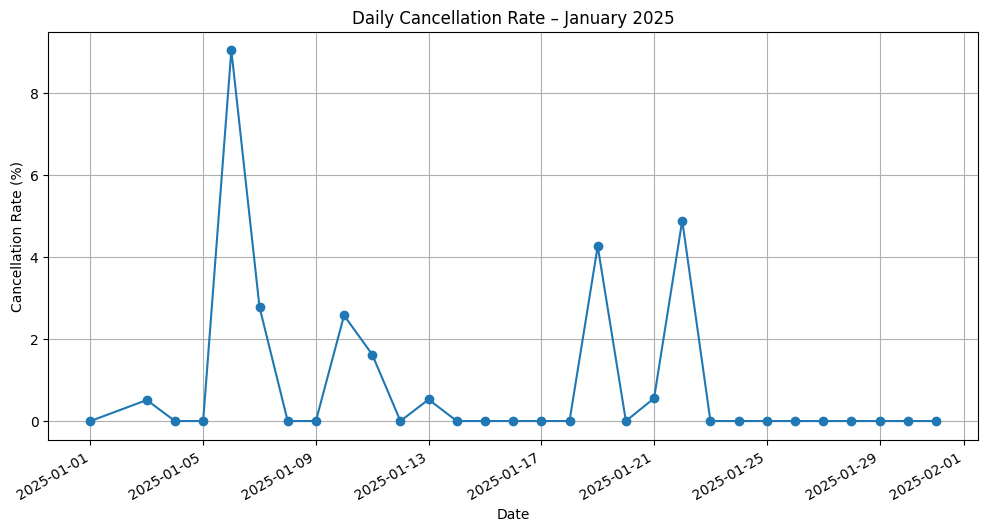

In [49]:
#cancellations by date in Jan:



plt.figure(figsize=(12,6))
cancel_by_date.plot(marker='o')
plt.title('Daily Cancellation Rate – January 2025')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

## Discussion and Results

## Conclusion

## References

1. Barber, David. Bayesian Reasoning and Machine Learning. Cambridge University Press, 2012.
2. Aste, Tomaso, Paola Cerchiello, and Roberta Scaramozzino. "Information-Theoretic Causality Detection between Financial and Sentiment Data."Entropy, vol. 24, no. 6, 2022, pp. 1–18. DOI:10.3390/e24060774.
3. Metz, Cade. "Microsoft Puts OpenAI’s Sam Altman in Charge of New Advanced AI Research Team."
The New York Times, 20 Nov. 2023, www.nytimes.com/2023/11/20/technology/openai-microsoft-altman.html

## Appendix